In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# String Simulation
To create the following string simulation the following formula is calculated $^{[1]}$

$$\large A = \left[{2h \over n^2\pi^2} {L^2 \over d(L-d)}sin({dn\pi \over L})\right]$$

$$\large B = sin\left({n\pi \over L}\right) cos\left(\pi {nc \over 2L}t\right)$$

$$\large y(x, t) = \sum^{N}_{n=1} A * B$$

Where,
- N is the number of terms
- c is the speed of the string 
- d is the distance the string bends
- h is the height of the of the string
- L is the length of the string
- t is the time

# Calculation

- calc_string() is created, which calculates the height of the string at any given point in time from its speed and length.

    - It also considers distance for calculating how long it will take for that particular term to travel from one end to another (frame).
    
- Finally, this function returns a multiplication of the two equations: A and B, which are calculated according to sinusoidal motion.
- These values are then used in update(), where they are added together over each frame until all 10,000 points have been calculated.

In [19]:
# [1]
def calc_string(n, x, frame):
    A = ((2 * h) / pow(n * np.pi, 2)) * (pow(L, 2) / (d * (L - d))) * np.sin((d * n * np.pi) / L)
    B = np.sin(n * np.pi * x/ L) * np.cos(2 * np.pi * n * c * frame / L)
    return A * B

# Animation
- The animation starts off by plotting out both axes with orange lines before animating them back-and-forth 100 times per second for 500 frames total (100 * 5 seconds).

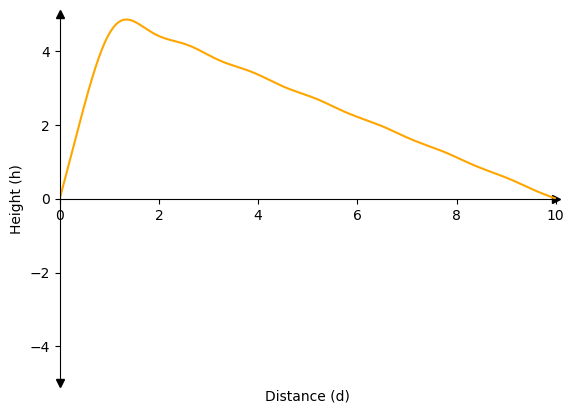

In [20]:
fig, ax = plt.subplots()
N = 15     # NUMBER OF TERMS 
c = 0.1    # SPEED AT WHICH THE STRING TRAVELS
L = 10     # LENGTH OF THE STRING
h = 5      # HEIGHT OF THE STRING TO BE PLUCKED
d = 1      # DISTANCE AT WHICH IT IS PLUCKED


# CREATING A LINSPACE TO THE LENGTH OF THE STRING
x = np.linspace(0, L, 500)


# SETTING THE AXES
ax.set_xlim(0, L)
ax.set_ylim(-h, h)
ax.set_xlabel('Distance (d)')
ax.set_ylabel('Height (h)')
ax.xaxis.labelpad = 120
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_position('center')


# PLOTTING ARROWS ON THE GRAPH
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(0, -5, "vk", transform=ax.get_yaxis_transform(), clip_on=False)


# CREATING THE ANIMATION FOR THE STRING
def update(frame):
    y = [[] for _ in range(N)]
    for i in range(len(x)):
        
        # CALCULATING THE WAVE FOR EACH TERM
        for n in range(1,N+1):
            y[n-1].append(calc_string(n, x[i], frame))
    
    # ADDING ALL THE TERMS TOGETHER TO CREATE A SINGLE STRING
    y = sum(np.array(y))
    string.set_data(x, y)
    return string

string, = ax.plot([], [], "orange")
animation = FuncAnimation(fig, update, frames=100, interval=50)
animation.save('string_simulation.gif', writer='pillow')

# References

[[1] The Plucked Fixed-Fixed String](https://tinyurl.com/mm7f477z)

# Particle Simulation

The position for each individual particle is calculated using the following formula

$$Rcos(kx-\omega{t}) + (1-R)cos(kx+\omega{t})$$

where,
- $\omega$ = 0.2
- R = 0.2
- k = 1.5
- t = 1



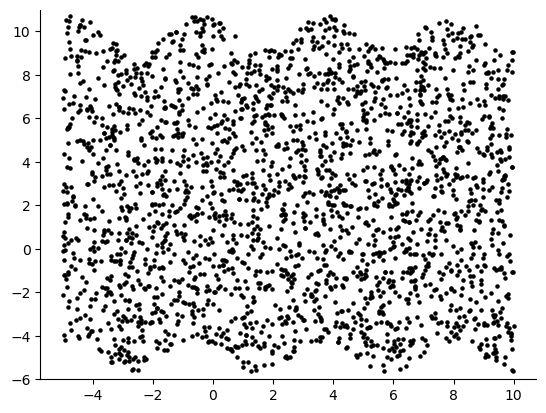

In [30]:
# CREATING A TWO DIMENSIONAL UNIFORM ARRAY WITH RANDOM VALUES OF SIZE (2500, 2)
xy = np.random.uniform(-5, 10, (2500, 2))

fig, ax = plt.subplots()
ax.set_ylim(-6, 11)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


# DEFINING THE CONSTANTS
w = 0.2
R = 0.2
k = 1.5
t = 1


# ANIMATING THE PARTICLE SIMULATION
def animate(frame):
    temp = np.copy(xy)
    for i in range(len(temp)):
        x = temp[i][0]
        
        # CALCULATING THE PARTICLE POSITION
        part_pos = R * np.cos(k * x - w * frame) + (1 - R) * np.cos(k * x + w * frame)
        temp[i][1] += part_pos
    scatter_acoustic.set_offsets(np.c_[temp[:, 0], temp[:, 1]])



scatter_acoustic = ax.scatter(xy[:, 0], xy[:, 1], s=5, c="k")

ani = FuncAnimation(fig, animate, frames=100, interval=50)
ani.save('partical_simulation.gif', writer='pillow')